# BIRTH DATES FROM EMA


# Get the EMA Birth Dates sheet


In [3]:
%cd '/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection'

/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection


In [9]:
import sys
import os
import logging

sys.path.append(
    "/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection/02_AllThingsData/Utils/DataRetrieval/EMA_BirthDates"
)

from EMA_BirthDates_Loader import EMA_BirthDates_Loader


sys.path.append(
    "/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection/02_AllThingsData/Utils/DataRetrieval/MedStat/Scripts"
)
from MedStatScraper import MedStatScraper

sys.path.append(
    "/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection/02_AllThingsData/Utils/DataRetrieval/WHO-ATC-Scraper"
)
from WHO_ATC_Scraper import ATCScraper

In [13]:
logger = logging.getLogger("EMA_BirthDates_Loader")
logger.setLevel(logging.INFO)

ema_loader = EMA_BirthDates_Loader(MedStatScraper, ATCScraper, logger=logger)
ema_loader.load_ema_data()
ema_loader.preprocess_data(all_atc_drugs=True, only_dk_drugs=False)
print(ema_loader.df.shape)
ema_loader.df.head(3)

(29, 4)


,ID,DrugName,BirthDate,BirthYear
0,1728,imipramine,1958-03-13,1958
1,3046,trimipramine,1960-10-05,1960
2,2218,opipramol,1961-10-12,1961


# Plot it on a timeline


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# get colors
# load color df
color_df = pd.read_csv("02_AllThingsData/Utils/Plotting/Data/ColorPalettes_PerATC.csv")

merged_df = pd.merge(ema_loader.df, color_df, on="DrugName")

df_plotting = merged_df[["DrugName", "DrugClass", "BirthYear", "Color", "ColorPalette"]]

df_plotting.to_csv(
    "02_AllThingsData/MA-EU_Based/Data/EMA_MA_Drugs_For_Plotting.csv",
    index=False,
)

df_plotting.head(2)

,DrugName,DrugClass,BirthYear,Color,ColorPalette
0,imipramine,Non-selective monoamine reuptake inhibitors,1958,"(0.8978854286812764, 0.939038831218762, 0.9773...",Blues
1,trimipramine,Non-selective monoamine reuptake inhibitors,1960,"(0.7506343713956171, 0.8478431372549019, 0.928...",Blues


# PLOT THIS


In [16]:
sys.path.append("02_AllThingsData/Utils/Plotting")
from MA_TimelinePlot import BirthYearTimelinePlotter

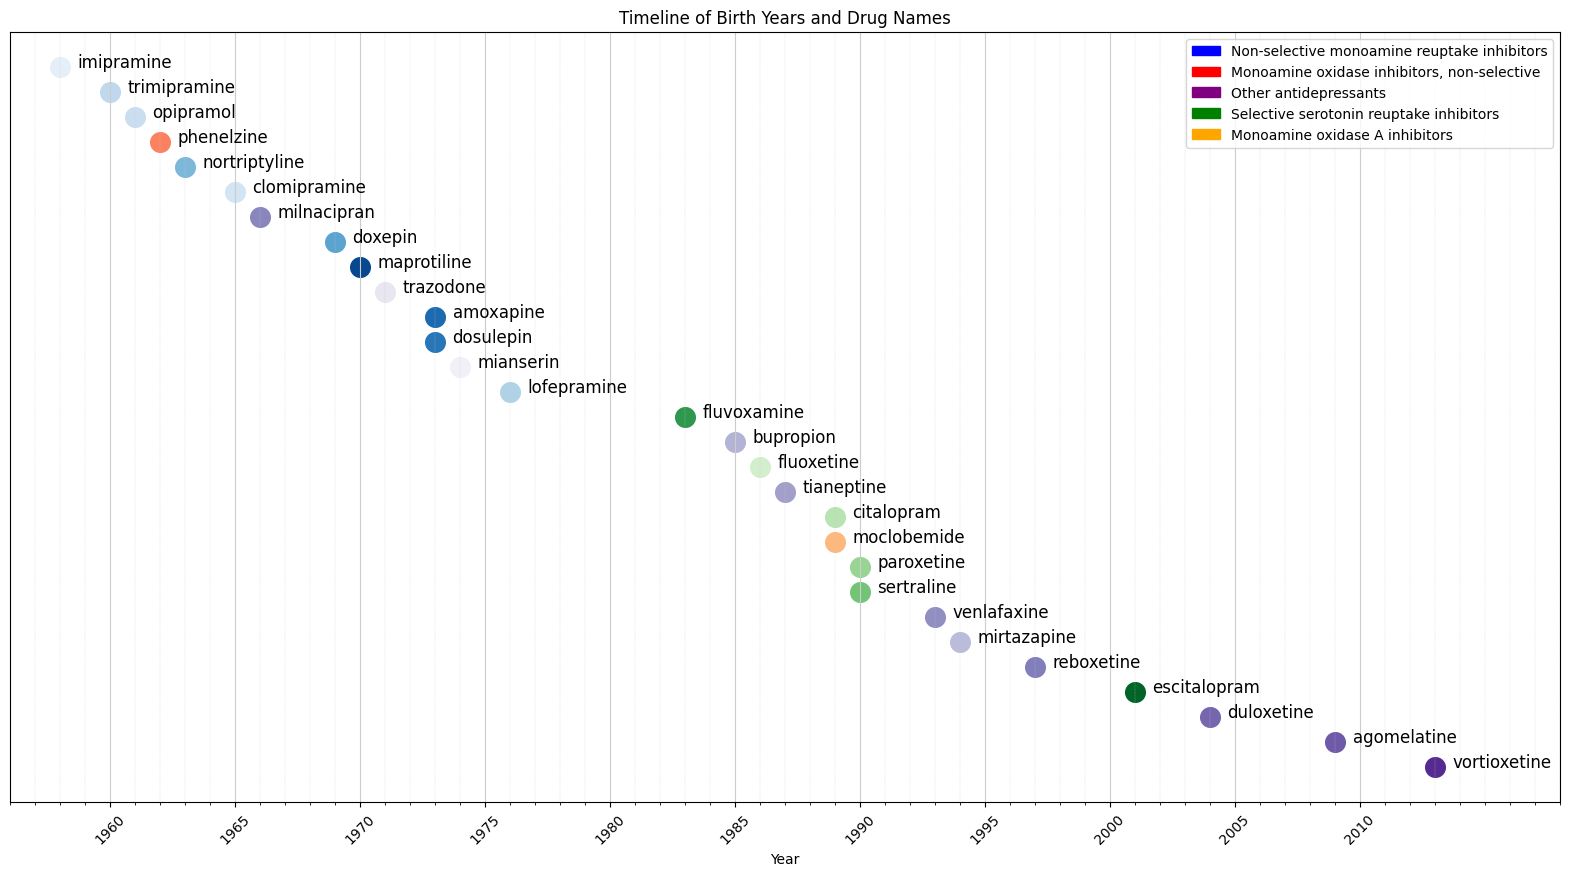

In [18]:
plotter = BirthYearTimelinePlotter(df=df_plotting, style=1)
plotter.plot_birth_year_timeline(
    save_path="02_AllThingsData/MA-EU_Based/imgs/EU_BirthYearTimeline_AllMedStat_1.png",
    show_note=False,
    note_text="MA prior to 1982 shown at 1982.",
)

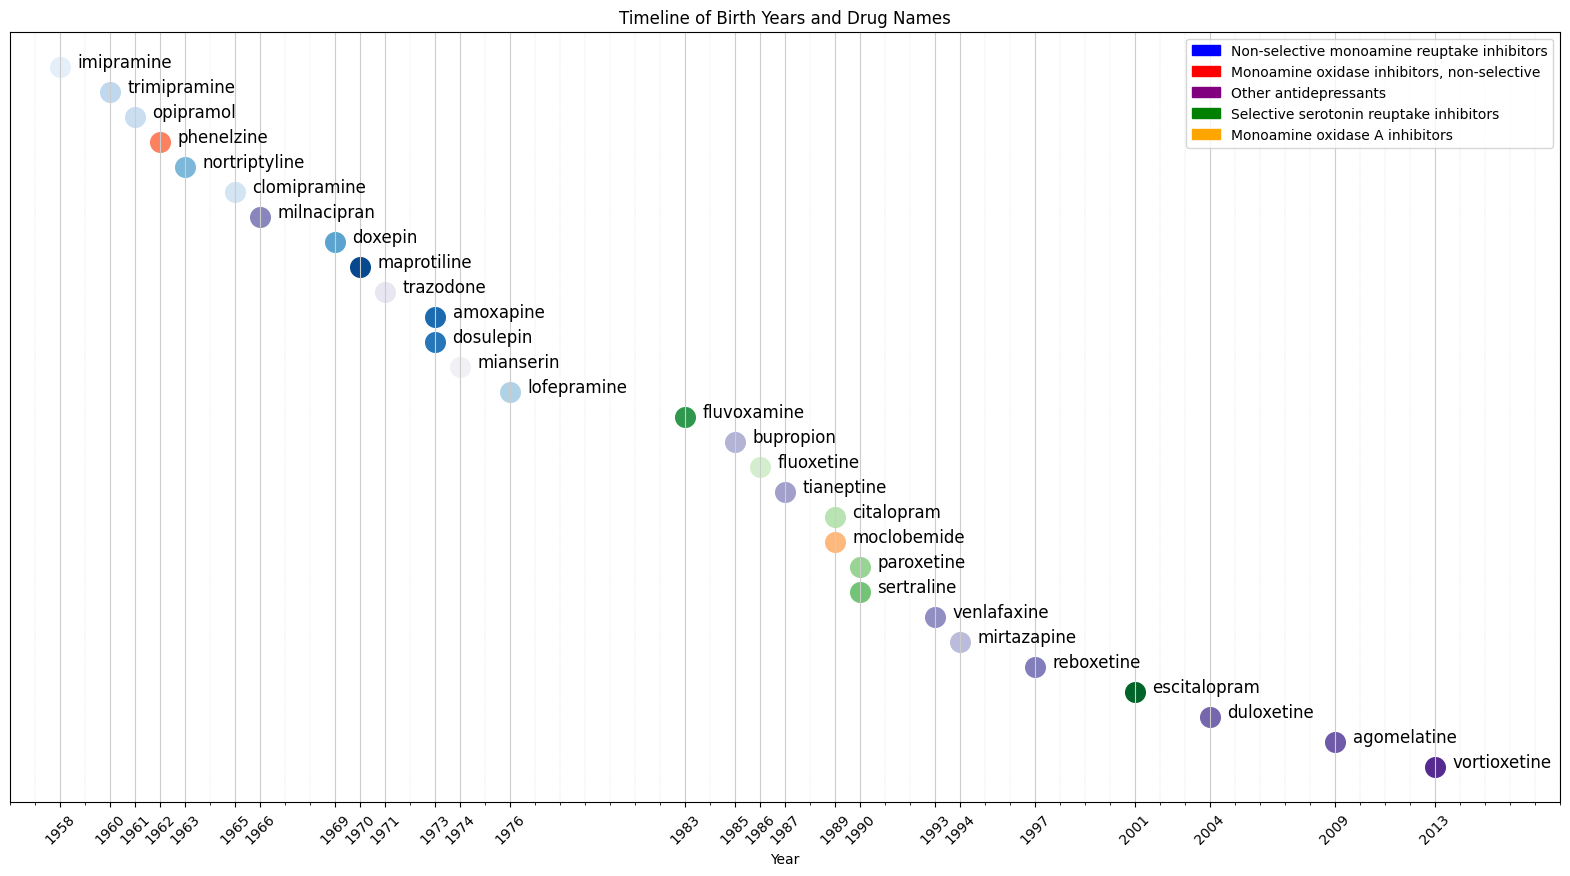

In [19]:
plotter = BirthYearTimelinePlotter(df=df_plotting, style=2)
plotter.plot_birth_year_timeline(
    save_path="02_AllThingsData/MA-EU_Based/imgs/EU_BirthYearTimeline_AllMedStat_2.png",
    show_note=False,
    note_text="MA prior to 1982 shown at 1982.",
)